# Overfitting（過度擬合）

是指機器學習模型在訓練數據上表現良好，但在新的、未見過的數據上表現不佳的情況。簡而言之，模型在訓練數據上“過度學習”，導致對於噪音和隨機變動過於敏感，無法很好地泛化到新的數據。

當模型的複雜度過高，例如具有過多的參數或自由度，它可能會在訓練數據中捕捉到一些噪音或局部特徵，從而使模型在訓練數據上表現出色。然而，這種過度特化的模型可能無法在未見過的數據上通用，因為它過度適應了訓練數據的細節，而忽略了整體的數據模式。

## 解決過度擬合的方法包括：

* 簡化模型：降低模型的複雜度，例如減少參數數量或降低多項式次數。
* 使用正則化：添加正則化項，如L1或L2正則化，以限制模型參數的大小。
* 增加數據量：增加更多的訓練數據，有助於模型學習更一般化的模式。
* 使用交叉驗證：通過交叉驗證來評估模型的泛化能力，選擇最佳模型。
* 特徵選擇和特徵提取：選擇重要的特徵或進行特徵轉換，以減少模型對噪音的敏感性。


## 參數和 overfitting 的關係

參數越多會增加模型的複雜度，這意味著模型更有可能過度擬合訓練數據，包括噪音和隨機變動。當參數數量過多時，模型可以更容易地調整自身以擬合訓練數據中的任何細微變動，甚至可能在訓練數據中捕捉到噪音。

### 過多的參數可能導致以下情況：

* 噪音過度擬合：模型可能捕捉到訓練數據中的隨機噪音，導致模型在未見過的數據上表現不佳。

* 選擇偶然特徵：當參數過多時，模型可能會隨機地選擇某些特徵，即使這些特徵與目標變數之間沒有實際關聯性。

* 過度適應訓練數據：模型可能嘗試在訓練數據上擬合過多的細節，導致在新數據上的泛化能力不佳。

### 避免方法

* 正則化：通過在成本函數中添加正則化項，限制模型參數的大小，從而降低模型的複雜度。

* 特徵選擇：僅選擇具有高相關性的特徵，避免選擇不必要的特徵。

* 交叉驗證：使用交叉驗證來評估模型在不同數據子集上的泛化能力，選擇合適的模型複雜度

## Best Fit
Best Fit 為最佳的 fit 位置, 在那個模型複雜度下的 Test Error 最小. 若降低複雜度則會欠擬合(underfitting), 而提高複雜度則會過度配飾(Overfitting)

[圖片來源](https://www.analyticsvidhya.com/blog/2020/02/underfitting-overfitting-best-fitting-machine-learning/)

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/Screenshot-2020-02-06-at-11.09.13.png" width="50%" height="50%">

## 偏差-變異性權衡

偏差和變異性之間存在權衡關係。一般來說，模型的複雜度越高，其偏差越低（能更好地擬合訓練數據），但變異性越高（對新數據的泛化能力較差）。

* 偏差（Bias）：

    偏差指的是模型的預測與實際值之間的差異，即模型的預測能力。
    高偏差表示模型對於訓練數據和測試數據的預測效果都不好，這種情況下模型無法很好地捕捉數據的規律，可能會出現欠擬合（underfitting）。

* 變異性（Variance）：

    變異性指的是模型對於不同的訓練數據集的預測結果的差異，即模型的泛化能力。
    高變異性表示模型對於不同的訓練數據表現差異很大，可能會過度擬合（overfitting）訓練數據，但對於新數據的預測效果不佳。

* 過度擬合（Overfitting）：

    過度擬合發生在模型過度擬合訓練數據，將噪音也納入模型的情況。
    在過度擬合的情況下，模型對於訓練數據的預測效果非常好，但對於新數據的預測效果較差，因為模型學習了訓練數據中的噪音。

[圖片來源](https://www.v7labs.com/blog/overfitting-vs-underfitting)

![圖片](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/627d12494803140c71981f73_61f7b61654f03b0d0894bf12_model.png)


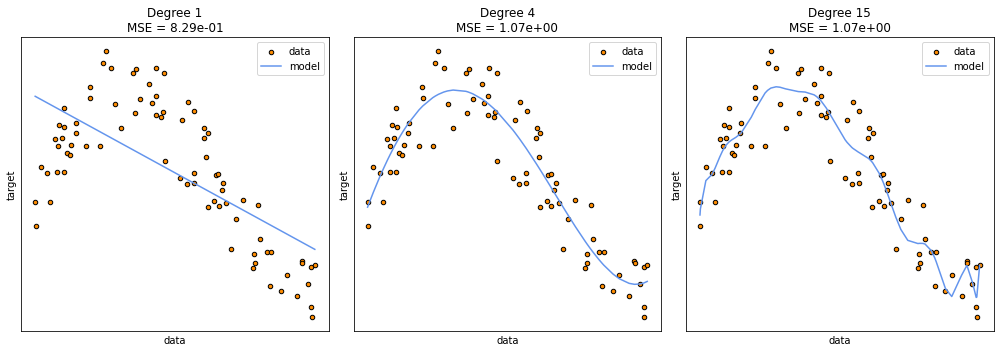

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成虛擬數據
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, X.shape[0])

# 適合不同次數的多項式模型
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 創建多項式特徵
    polynomial_features = np.polyfit(X.ravel(), y, degree)
    polynomial = np.poly1d(polynomial_features)
    
    # 繪製數據和多項式擬合線
    plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(X, polynomial(X), color="cornflowerblue", label="model")
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Degree {}\nMSE = {:.2e}".format(degree, np.mean((polynomial(X) - y) ** 2)))
    plt.legend()

plt.tight_layout()
plt.show()


## best fit
best fit 為最佳 fit 位置, 其左側為 Underfitting, 右側則為 Overfitting

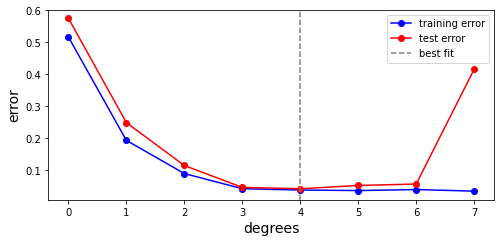

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 生成虛擬數據
np.random.seed(32)
data = 5 * np.random.rand(200, 2)
train_X = data[:150]
test_X  = data[150:]
train_y = np.sin(train_X) + np.random.normal(0, 0.2, (train_X.shape[0], 2))
test_y = np.sin(test_X) + np.random.normal(0, 0.2, (test_X.shape[0],2) )

# 適合不同次數的多項式模型
degrees = [i for i in range(8)]
mse_list = [[], []]
for i, degree in enumerate(degrees):

    # transformed data
    poly_features = PolynomialFeatures(degree = degree)
    train_X_poly_transformed = poly_features.fit_transform(train_X)
    test_X_poly_transformed = poly_features.transform(test_X)

    # fit model
    reg_poly = LinearRegression()
    reg_poly.fit(train_X_poly_transformed, train_y)

    # pred data
    pred_y = reg_poly.predict(train_X_poly_transformed)
    mse_list[0].append(mean_squared_error(train_y, pred_y))
    pred_y = reg_poly.predict(test_X_poly_transformed)
    mse_list[1].append(mean_squared_error(test_y, pred_y))

plt.figure(figsize=(8, 3.5)) #圖大小
plt.plot(degrees, mse_list[0], "bo-", label = 'training error') #bo- : 藍色 圓點 跟 線
plt.plot(degrees, mse_list[1], "ro-", label = 'test error') #ro- : 紅色 圓點 跟 線
plt.axvline(x = 4, color='gray', linestyle='--', label='best fit') # 添加垂直虛線
plt.xlabel("degrees", fontsize=14) #斜體k ,大小14
plt.ylabel("error", fontsize=14)
plt.legend() # 圖示


plt.show()